In [1]:
import pygraphviz as pgv
import dgl
from IPython.display import Image
import networkx as nx

# DGLHeteroGraph
Let's explore some features connected with Heteregenous graphs which we can use within DGL Library.

A **Heterogeneous graph** is defined as a graph with node types and edge types.

If two edges share the same edge type, then their source nodes, as well as their destination nodes, also have the same type (the source node types don’t have to be the same as the destination node types).

More about Heterographs, you can find in this paper:
https://arxiv.org/pdf/1511.04854.pdf

References:
- https://docs.dgl.ai/api/python/heterograph.html
- https://docs.dgl.ai/tutorials/basics/5_hetero.html

In [2]:
def plot_heterograph(nxg, filepath):
    ag = pgv.AGraph(strict=False, directed=True)
    for u, v, k in nxg.edges(keys=True):
        ag.add_edge(u, v, label=k)
    
    ag.layout('dot')
    ag.draw(filepath)

### Hetergenous example
Interesting example of heterograph could be computer games relation graph. Players follow other players and of course play the games. Developers develop computer games and also there are some cooperations beetwen different studios.

#### Players

| Player | ID |
|--------|----|
| Alice  | 0  |
| Bob    | 1  |
| Chuck  | 2  |
| Dennis | 3  |

Relations:
- Alice -\[follows\]-> Bob
- Bob -\[follows\]-> Chuck
- Dennis -\[follows\]-> Chuck

Games:

| Game  | ID |
|-------|----|
| FIFA  | 0  |
| BF    | 1  |
| AC    | 2  |

Relations:

- Alice -\[plays\]-> FIFA
- Bob -\[plays\]-> FIFA
- Bob -\[plays\]-> BF
- Chuck -\[plays\]-> BF
- Chuck -\[plays\]-> AC
- Dennis -\[plays\]-> AC

Developers:

| Developer | ID |
|-------|----|
| EA | 0  |
| Ubisoft | 1  |

Relations:

- EA -\[develops\]-> FIFA
- EA -\[develops\]-> BF
- Ubisoft -\[develops\]-> AC

In [3]:
follow_edges = [(0, 1), (1, 2), (3, 2)]
play_edges = [(0,0), (1,0), (1,1), (2,1), (2,2), (3,2)]
develop_edges = [(0,0), (0,1), (1,2)]

player_follows = dgl.graph(follow_edges, 'player', 'follows')
player_plays = dgl.bipartite(play_edges, 'player', 'plays', 'game')
company_develops = dgl.bipartite(develop_edges, 'company', 'develops', 'game')

g = dgl.hetero_from_relations([player_follows, player_plays, company_develops])

Alternatively:

In [4]:
 g = dgl.heterograph({
     ('player', 'follows', 'player'): follow_edges,
     ('player', 'plays', 'game'): play_edges,
     ('company', 'develops', 'game'): develop_edges,
     })

Now, we can visualize provided heterograph:

In [5]:
plot_heterograph(g.metagraph, 'img/gamedev_graph.png')

In [6]:
Image(url='img/gamedev_graph.png')

In [7]:
ag1 = pgv.AGraph(strict=False, directed=True)
for fe in follow_edges:
    
    ag1.add_edge('p'+str(fe[0]), 'p'+str(fe[1]), label='follows')

for pe in play_edges:
    ag1.add_edge('p'+str(pe[0]), 'g'+str(pe[1]), label='plays')

for de in develop_edges:
    ag1.add_edge('c'+str(de[0]), 'g'+str(de[1]), label='develops')

ag1.layout('dot')
ag1.draw('img/gamedev_heterograph.png')

In [8]:
Image(url='img/gamedev_heterograph.png')

In [9]:
g.number_of_nodes('player')

4

In [10]:
g.number_of_edges('plays')

6

In [11]:
g.out_degrees(etype='develops')

tensor([2, 1])

In [12]:
g.in_edges(0, etype='develops')

(tensor([0]), tensor([0]))

### Different conversions

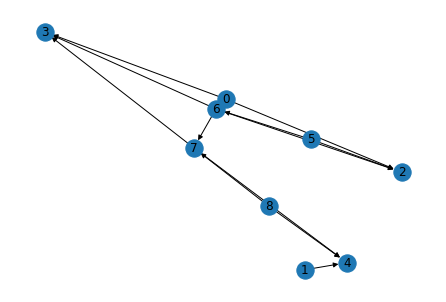

In [13]:
homo_g = dgl.to_homo(g)
nx.draw(homo_g.to_networkx(), with_labels=True)

In [14]:
homo_g.ndata

{'_TYPE': tensor([0, 0, 1, 1, 1, 2, 2, 2, 2]), '_ID': tensor([0, 1, 0, 1, 2, 0, 1, 2, 3])}

In [15]:
homo_g.edata

{'_TYPE': tensor([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2]), '_ID': tensor([0, 1, 2, 0, 1, 2, 3, 4, 5, 0, 1, 2])}

In [16]:
g.to_networkx

<bound method DGLHeteroGraph.to_networkx of Graph(num_nodes={'company': 2, 'game': 3, 'player': 4},
      num_edges={('player', 'follows', 'player'): 3, ('player', 'plays', 'game'): 6, ('company', 'develops', 'game'): 3},
      metagraph=[('company', 'game'), ('player', 'player'), ('player', 'game')])>

In [17]:
g.adjacency_matrix

<bound method DGLHeteroGraph.adjacency_matrix of Graph(num_nodes={'company': 2, 'game': 3, 'player': 4},
      num_edges={('player', 'follows', 'player'): 3, ('player', 'plays', 'game'): 6, ('company', 'develops', 'game'): 3},
      metagraph=[('company', 'game'), ('player', 'player'), ('player', 'game')])>

In [18]:
g.incidence_matrix

<bound method DGLHeteroGraph.incidence_matrix of Graph(num_nodes={'company': 2, 'game': 3, 'player': 4},
      num_edges={('player', 'follows', 'player'): 3, ('player', 'plays', 'game'): 6, ('company', 'develops', 'game'): 3},
      metagraph=[('company', 'game'), ('player', 'player'), ('player', 'game')])>

In [19]:
g.metagraph

In [20]:
g.is_multigraph

False

In [21]:
g.predecessors(v=1,etype='plays')

tensor([1, 2])

In [22]:
g.successors(v=1, etype='develops')

tensor([2])